##### Quistian Navarro Juan Luis
#### **Primer examen parcial** - Visión Computacional

#### **Planteamiento del problema**
Se cuenta con la siguiente imagen "Jorge_Campos.jpg". Una imagen del protero mexicano en acción. Podeos ver como esta inclinado a detener el disparo a gol de otro futbolista. La imagen esta editada para tener un tanto de ruido que da el efecto de desenfoque. 

Asi que tendremos que aplciar operaciones que adelante se mencionan para obtener el mejor resultado posible. 

In [146]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [147]:
img_path = "./images/Jorge_Campos.jpg" # path source of the image
output_path = "./doc/images/"

In [148]:
# Function to display the image
def plot_img(img, output, cmap = None, title = None, figsize=None):
    plt.figure(figsize=figsize)
    # plt.title(title)
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    if output is not None: 
        plt.savefig(os.path.join(output, f"{title}.png"), bbox_inches= 'tight')
    plt.show(block=False)
    print(img.shape)

#### **Image Original**

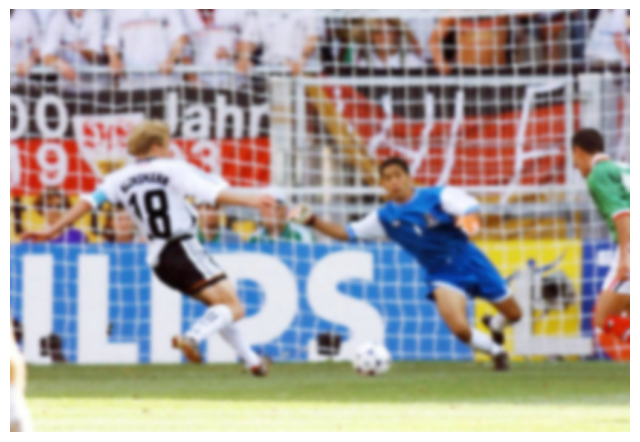

(569, 834, 3)


In [149]:
img = cv2.imread(img_path) # read image
plot_img(cv2.cvtColor(img,cv2.COLOR_BGR2RGB),title='Original Image', figsize=(8,8), output=output_path)  # Convert BGR to RGB for display

#### **Sharpened filter (Median kernel)**

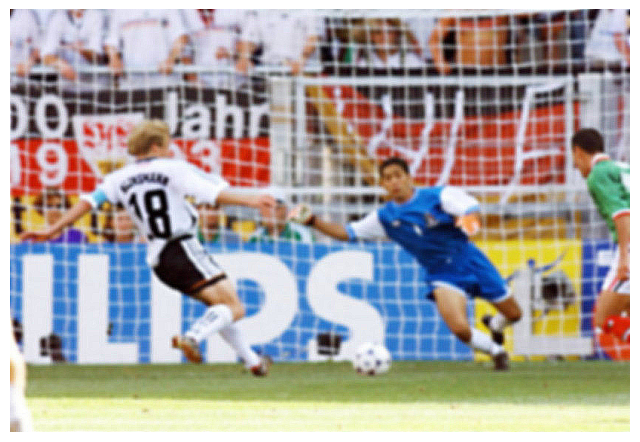

(569, 834, 3)


In [150]:
# create a laplacian kernel
kernel = np.array([[-1, -1, -1],
                   [-1,  9, -1],
                   [-1, -1, -1]])

# apply the kernen to the image
sharpened_image = cv2.filter2D(img, -1, kernel)
plot_img(cv2.cvtColor(sharpened_image,cv2.COLOR_BGR2RGB), title='Sharpened filter (median kernel)', figsize=(8,8), output = output_path)

#### **Non local menas**

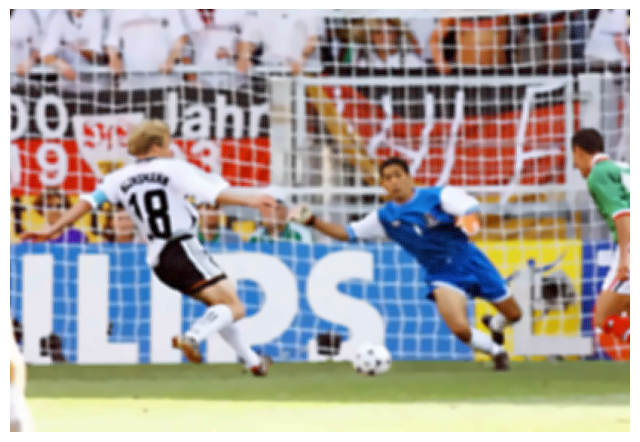

(569, 834, 3)


In [151]:
deblurred = cv2.fastNlMeansDenoisingColored(sharpened_image,None,3,3,7,15)
deblurred = cv2.fastNlMeansDenoisingColored(deblurred,None,3,3,7,15)
plot_img(cv2.cvtColor(deblurred,cv2.COLOR_BGR2RGB), title='Non local means', figsize=(8,8), output=output_path)

#### **Low pass filter (fourier)**

In [152]:
def low_pass_filter(image, radius, pixel_size=None):
    N = image.shape[0]
    if pixel_size is not None:
        radius = int((N * pixel_size) / radius)

    fft = np.fft.fft2(image)
    fshift = np.fft.fftshift(fft)
    crow, ccol = int(image.shape[0] / 2), int(image.shape[1] / 2)
    mask = np.zeros_like(image)
    
    mask = cv2.circle(mask, (ccol, crow), radius, 1, thickness=-1)
    
    fshift_filtered = fshift * mask
    f_filtered_shifted = np.fft.ifftshift(fshift_filtered)
    inv_image = np.fft.ifft2(f_filtered_shifted)
    filtered_image = np.abs(inv_image)
    
    filtered_image -= filtered_image.min()
    filtered_image /= filtered_image.max()
    filtered_image = (filtered_image * 255).astype(np.uint8)
    
    return filtered_image

In [153]:
def low_pass_filter_color(image, radius, pixel_size=None):
    channels = cv2.split(image)
    filtered_channels = []
    
    for channel in channels:
        filtered_channel = low_pass_filter(channel, radius, pixel_size)
        filtered_channels.append(filtered_channel)

    filtered_image = cv2.merge(filtered_channels)
    return filtered_image

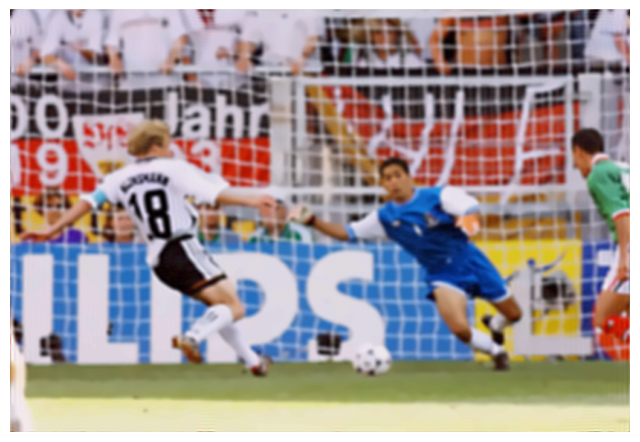

(569, 834, 3)


In [154]:
radius = 120
blur_lowpass_color = low_pass_filter_color(deblurred,radius)
plot_img(cv2.cvtColor(blur_lowpass_color,cv2.COLOR_BGR2RGB), title='Low pass filter' ,figsize=(8,8), output=output_path)

#### **Sharpened filter 2 times (Smooth kernel)**

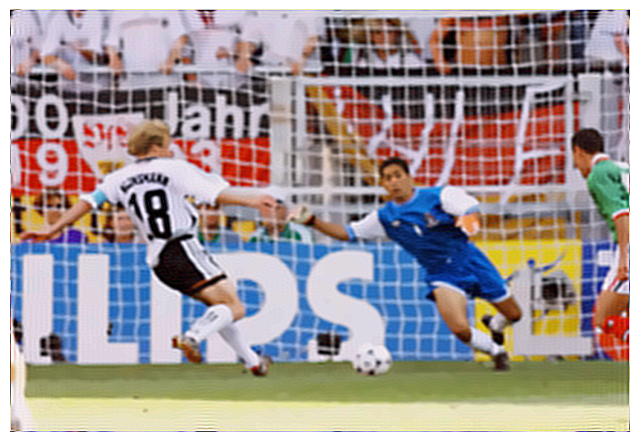

(569, 834, 3)


In [155]:
# create a laplacian kernel
kernel =np.array([[ 0, -1,  0],
                  [-1,  5, -1],
                  [ 0, -1,  0]])

# apply the kernen to the image
sharpened_image2 = cv2.filter2D(blur_lowpass_color, -1, kernel)
sharpened_image2 = cv2.filter2D(sharpened_image2, -1, kernel)
plot_img(cv2.cvtColor(sharpened_image2,cv2.COLOR_BGR2RGB), title='Sharpened filter (smooth kernerl)', figsize=(8,8), output=output_path)

#### **Cropped image**

In [156]:
def crop_image(image, x, y, w, h):
    image = image[y:y+h, x:x+w]
    return image

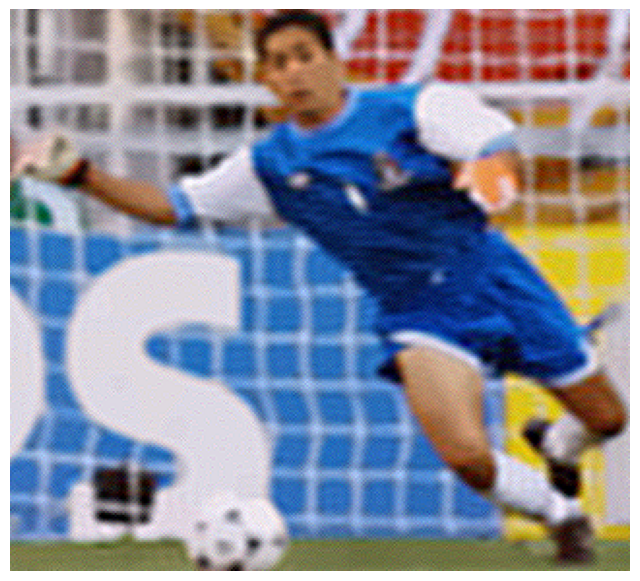

(290, 320, 3)


In [157]:
croped_img = crop_image(sharpened_image2, x=370,y=200,w=320, h= 290)
plot_img(cv2.cvtColor(croped_img,cv2.COLOR_BGR2RGB), title='Image cropped', figsize=(8,8), output=output_path)

#### **Original image cropped for comparison**

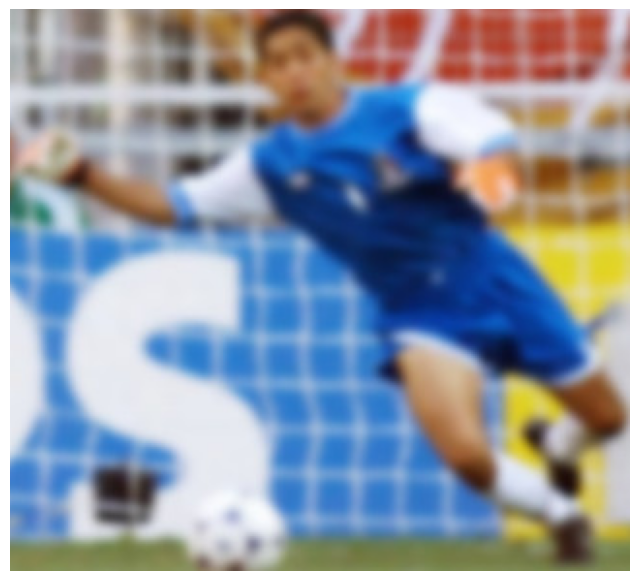

(290, 320, 3)


In [158]:
croped_img2 = crop_image(img, x=370,y=200,w=320, h= 290)
plot_img(cv2.cvtColor(croped_img2,cv2.COLOR_BGR2RGB), title='Original Image cropped', figsize=(8,8), output=output_path)

#### **Rotated Image**

In [159]:
def rotate_img(img,angle):
    h,w,_ = img.shape
    rotation_matix = cv2.getRotationMatrix2D((h/2,w/2), angle=angle, scale=1.0)
    return cv2.warpAffine(src=img, M=rotation_matix, dsize=(w, h))

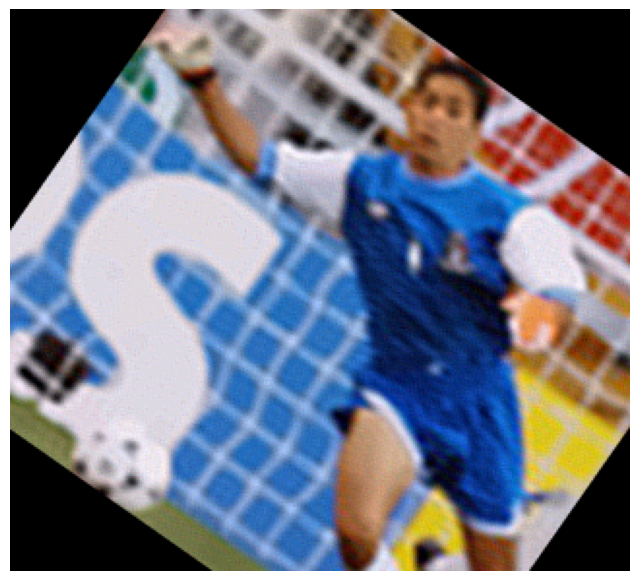

(290, 320, 3)


In [160]:
rotated_img = rotate_img(croped_img, angle=-35)
plot_img(cv2.cvtColor(rotated_img,cv2.COLOR_BGR2RGB), title='Rotated Image', figsize=(8,8), output=output_path)

#### **Referencias**
**Image filtering**: https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html. Accessed: 2024-09-15

**Non-local means denoising**: https://docs.opencv.org/3.4/d5/d69/tutorial_py_non_local_means.html. Accessed: 2024-09-15.

**WSTHUB. Python computer vision tutorials — image fourier transform / part 3**: https://wsthub.medium.com/
python-computer-vision-tutorials-image-fourier-transform-part-3-e65d10be4492. Accessed: 2024-09-15.
